In [1]:
#Instala las librería necesarias para usar Qiskit de IBM para la computación cuántica
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

In [20]:
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.quantum_info import Statevector
sim = Aer.get_backend('aer_simulator')

Implentar un cúbit

In [3]:
miprimercubit=QuantumCircuit(1) #Se crea un cubit cuántico

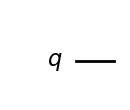

In [4]:
miprimercubit.draw(output="mpl") #Dibujar cúbit

In [5]:
vectorCuantico=Statevector(miprimercubit) #representar como un vector

In [6]:
vectorCuantico.draw(output="latex")

<IPython.core.display.Latex object>

In [7]:
type(miprimercubit)

qiskit.circuit.quantumcircuit.QuantumCircuit

Mediciones de cúbit

In [8]:
primeraMedicion=QuantumCircuit(1,1) #Agrego un cúbit y un canal para medir

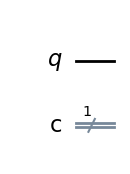

In [9]:
primeraMedicion.draw(output="mpl")

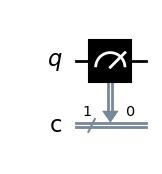

In [10]:
primeraMedicion.measure(0,0) #Mido el primer cúbit en el primer canal
primeraMedicion.draw(output="mpl") # Dibujarlo

In [11]:
#Contar los resultados de las mediciones que se hacen en el primer cúbit
conteo=sim.run(primeraMedicion).result().get_counts()

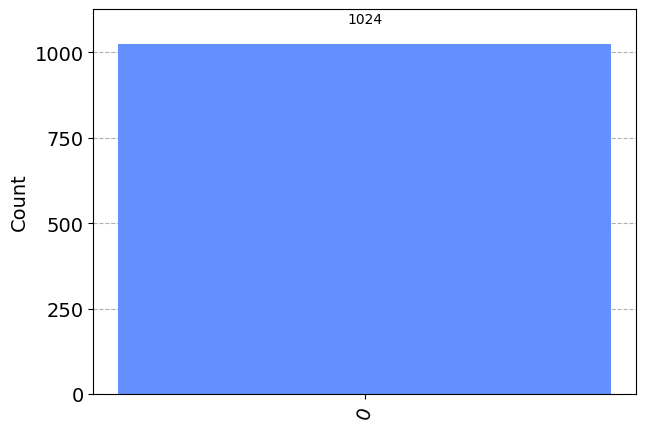

In [12]:
plot_histogram(conteo)

Creamos cubit |1> y medimos

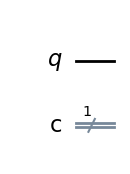

In [13]:
segundaMedicion=QuantumCircuit(1,1) #Agrego un cúbit y un canal para medir
segundaMedicion.draw(output="mpl")

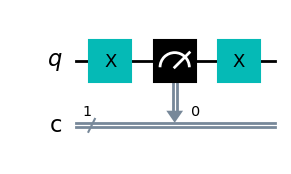

In [21]:
segundaMedicion.x(0)
segundaMedicion.draw(output="mpl")

In [15]:
#Dibujo mi cubit
vectorCuantico=Statevector(segundaMedicion)
vectorCuantico.draw(output="latex")

<IPython.core.display.Latex object>

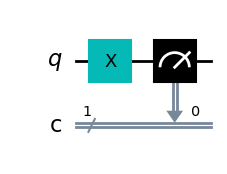

In [16]:
segundaMedicion.measure(0,0)
segundaMedicion.draw(output="mpl")

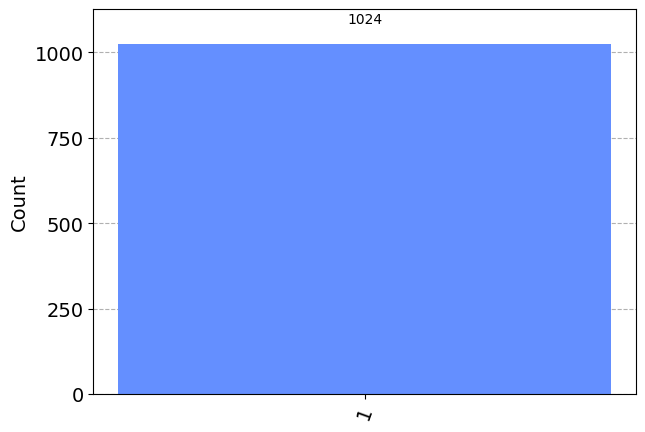

In [36]:
#Contar los resultados de las mediciones que se hacen en el cúbit
conteo=sim.run(segundaMedicion).result().get_counts()
plot_histogram(conteo)

Superposición

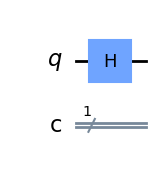

In [18]:
superposicion=QuantumCircuit(1,1)
superposicion.h(0)
superposicion.draw(output="mpl")

In [19]:
vectorCuantico=Statevector(superposicion)
vectorCuantico.draw(output="latex")

<IPython.core.display.Latex object>

Compuertas logicas

Compuerta X

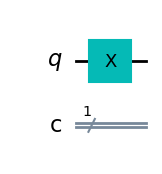

In [26]:
compuertaX=QuantumCircuit(1,1)
compuertaX.x(0) #Aplico compuerta lógica cuántica X al primer cubit
compuertaX.draw(output="mpl")

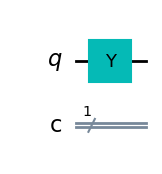

In [29]:
compuertaY=QuantumCircuit(1,1)
compuertaY.y(0) #Aplico compuerta lógica cuántica Y al primer cubit (cúbit 0)
compuertaY.draw(output="mpl")

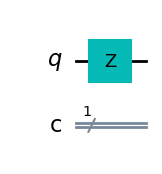

In [32]:
compuertaZ=QuantumCircuit(1,1) #Crear un cubit y un canal de medida
compuertaZ.z(0) #Aplico compuerta lógica cuántica Z al primer cubit (cúbit 0)
compuertaZ.draw(output="mpl")

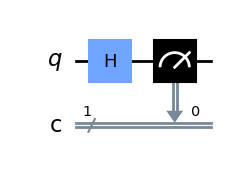

In [35]:
compuertaH=QuantumCircuit(1,1) #Crear un cubit y un canal de medida
compuertaH.h(0) #Aplico compuerta lógica cuántica H al primer cubit (cúbit 0)
compuertaH.measure(0,0)
compuertaH.draw(output="mpl")

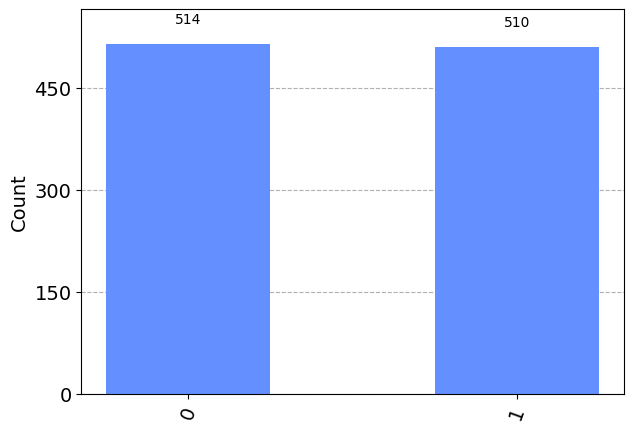

In [37]:
conteo=sim.run(compuertaH).result().get_counts()
plot_histogram(conteo)

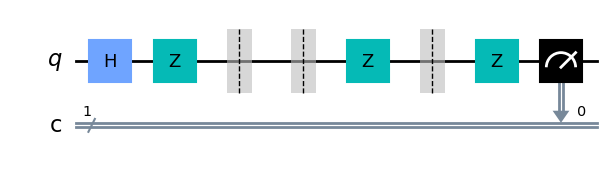

In [41]:
miPrimerCircuito=QuantumCircuit(1,1)
miPrimerCircuito.h(0)
miPrimerCircuito.z(0)
miPrimerCircuito.barrier()
miPrimerCircuito.barrier()
miPrimerCircuito.z(0)
miPrimerCircuito.barrier()
miPrimerCircuito.z(0)
miPrimerCircuito.measure(0,0)

miPrimerCircuito.draw(output="mpl")


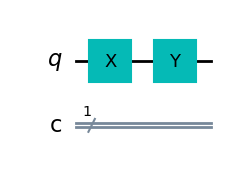

In [47]:
Circuito=QuantumCircuit(1,1)
Circuito.x(0)
Circuito.y(0)
Circuito.draw(output="mpl")

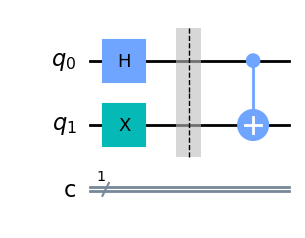

In [57]:
miSegundoCircuito=QuantumCircuit(2,1) #Crerar un cubit y un canal de medición
miSegundoCircuito.h(0) #Agrego compuerta H en primer cúbit (cúbit 0)
miSegundoCircuito.x(1) #Agrego compuerta X en primer segundo cúbit (cúbit 1)

miSegundoCircuito.barrier()

miSegundoCircuito.cx(0,1) #Controlled not (el cubit 0 controla al 1)

miSegundoCircuito.draw(output="mpl")

# Algoritmo de Deutsch
Con el algorimto de Deutsch podemos identificar si la funcion del oráculo es constante o balanceada con solo ejecutar una vez el algoritmo:

Si medimos 0 en el cúbit 0, la función es constante. Si medimos 1 en el qubit 0 la función es balanceada

Lo que verificaremos es que los oraculos construidos usando f(x) si sean identificados como balanceados o constantes en una ejecución

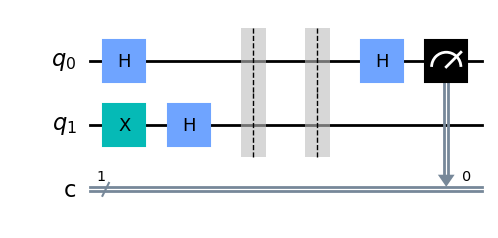

In [58]:
qc=QuantumCircuit(2,1) #Se crea un circuito cuántico con 2 bits cuánticos y 1 canal clásico
qc.x(1) #Compuerta X al segundo qubit (inicializar estado |1>)
qc.h(0) #Compuerta H al primer qubit
qc.h(1) #Compuerta H al segundo qubit
qc.barrier() #Barrera (empieza oráculo)
#Reservamos espacio para el oráculo
qc.barrier() #Barrera (termina oráculo)
qc.h(0) #Compuerta H al primer qubit
qc.measure(0,0) #Medimos el primer qubit y enviamos señal al canal clásico
qc.draw(output='mpl')

F1(x) se obtiene no agregando nada entre las barras, así que solo procedemos a medir

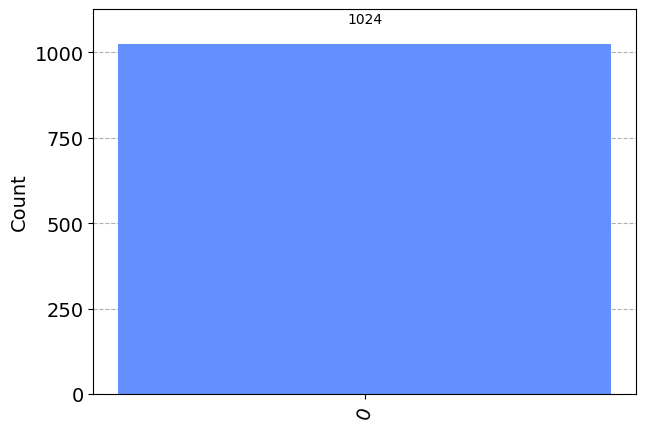

In [59]:
counts = sim.run(qc).result().get_counts()  #contando las medidas de simulador cuántico
plot_histogram(counts) #histrograma de resultados

F2(x) se obtiene agregando una X en el cúbit 0 entre las barras:

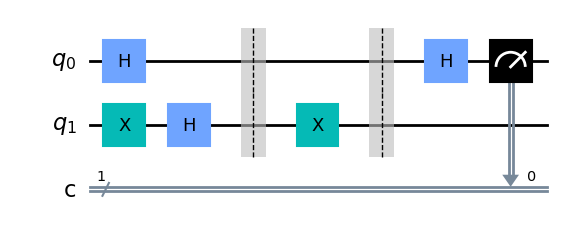

In [61]:
qc=QuantumCircuit(2,1) #Se crea un circuito cuántico con 2 bits cuánticos y 1 canal clásico
qc.x(1) #Compuerta X al segundo qubit (inicializar estado |1>)
qc.h(0) #Compuerta H al primer qubit
qc.h(1) #Compuerta H al segundo qubit
qc.barrier() #Barrera (empieza oráculo)

qc.x(1) #Compuerta X al segundo qubit

qc.barrier() #Barrera (termina oráculo)
qc.h(0) #Compuerta H al primer qubit
qc.measure(0,0) #Medimos el primer qubit y enviamos señal al canal clásico
qc.draw(output='mpl')

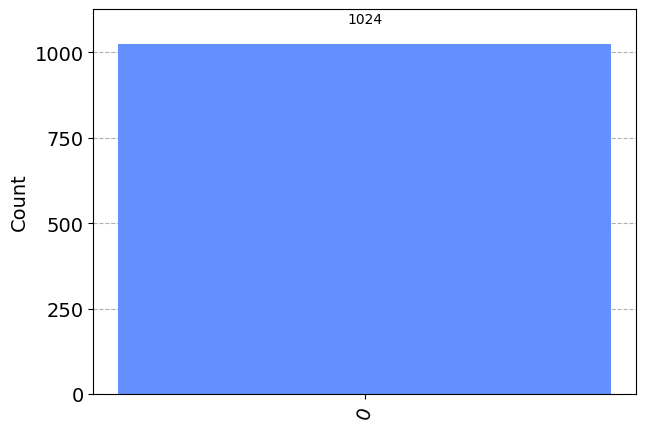

In [62]:
counts = sim.run(qc).result().get_counts()  #contando las medidas de simulador cuántico
plot_histogram(counts) #histrograma de resultados

Recordemos que las funciones f1(x) y f2(x) son las que determinamos constantes, en este caso comporbamos que efectivamente si da como cero el resultado de la medición

f3(x) se obtiene poniendo una compuerta CNOT entre el primer y segundo cúbit

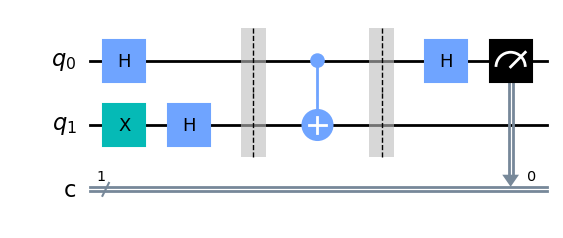

In [63]:
qc=QuantumCircuit(2,1) #Se crea un circuito cuántico con 2 bits cuánticos y 1 canal clásico
qc.x(1) #Compuerta X al segundo qubit (inicializar estado |1>)
qc.h(0) #Compuerta H al primer qubit
qc.h(1) #Compuerta H al segundo qubit
qc.barrier() #Barrera (empieza oráculo)

qc.cx(0,1) #Compuerta CNOT entre primer y segundo quibit (el primero es el que controla)

qc.barrier() #Barrera (termina oráculo)
qc.h(0) #Compuerta H al primer qubit
qc.measure(0,0) #Medimos el primer qubit y enviamos señal al canal clásico
qc.draw(output='mpl')

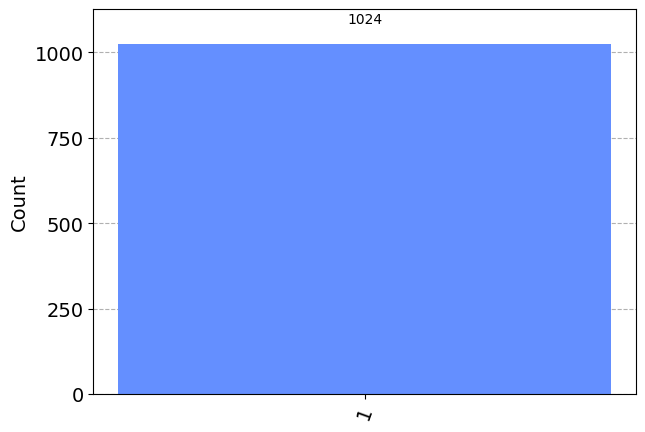

In [64]:
counts = sim.run(qc).result().get_counts()  #contando las medidas de simulador cuántico
plot_histogram(counts) #histrograma de resultados

finalmente f4(x) se obtiene con la CNOT anterior y una X en el segundo cúbit

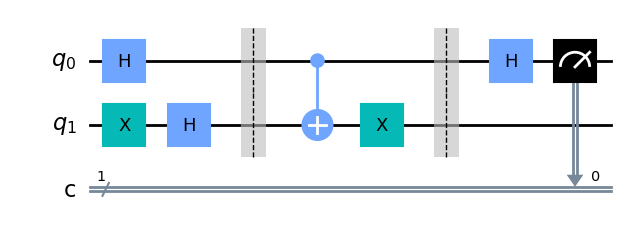

In [65]:
qc=QuantumCircuit(2,1) #Se crea un circuito cuántico con 2 bits cuánticos y 1 canal clásico
qc.x(1) #Compuerta X al segundo qubit (inicializar estado |1>)
qc.h(0) #Compuerta H al primer qubit
qc.h(1) #Compuerta H al segundo qubit
qc.barrier() #Barrera (empieza oráculo)

qc.cx(0,1) #Compuerta CNOT entre primer y segundo quibit (el primero es el que controla)
qc.x(1) #Compuerta X al segundo qubit

qc.barrier() #Barrera (termina oráculo)
qc.h(0) #Compuerta H al primer qubit
qc.measure(0,0) #Medimos el primer qubit y enviamos señal al canal clásico
qc.draw(output='mpl')

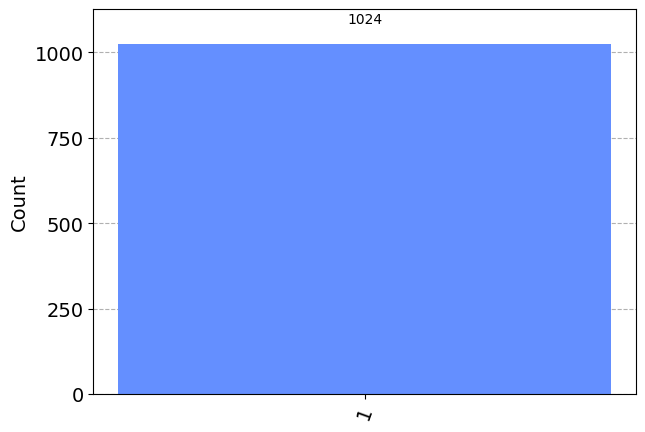

In [66]:
counts = sim.run(qc).result().get_counts()  #contando las medidas de simulador cuántico
plot_histogram(counts) #histrograma de resultados

Recordemos que las funciones f3(x) y f4(x) son las que determinamos balanceadas, en este caso comporbamos que efectivamente si da como uno el resultado de la medición